# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

from sklearn.metrics import confusion_matrix


# LOADING TRUE AND PREDICTED LABELS FROM ALL 3 MODEL TYPES

In [2]:
# Loading the true labels.
true_labels_model_allchans        = np.load('true_labels_all_reps_AllChannels.npy')
true_labels_model_nochan112       = np.load('true_labels_all_reps_NoChan112.npy')
true_labels_model_handknob        = np.load('true_labels_all_reps_Handknob.npy')
true_labels_model_badchannelsonly = np.load('true_labels_all_reps_badchannelsonly.npy')

# Loading the predicted labels.
pred_labels_model_allchans        = np.load('pred_labels_all_reps_AllChannels.npy')
pred_labels_model_nochan112       = np.load('pred_labels_all_reps_NoChan112.npy')
pred_labels_model_handknob        = np.load('pred_labels_all_reps_Handknob.npy')
pred_labels_model_badchannelsonly = np.load('pred_labels_all_reps_badchannelsonly.npy')


# FUNCTION TO DISPLAY CONFUSION MATRIX

In [3]:
def confusion_matrix_display(cm, labels, suppress_figs='No'):
    """
    DESCRIPTION:
    Given the user-input confusion matrix array and corresponding labels, the confusion matrix is displayed.

    INPUT VARIABLES:
    cm:     [array > float]; Confusion matrix holding the accuracy of the true (vertical axis) and predicted (horizontal axis) labels.
    labels: [list > strings]; Class labels for the confusion matrix.
    """
    
    # COMPUTATION:
    
    # Computing the normalized confusion matrix.
    cm_norm       = np.divide(cm.transpose(), np.sum(cm, axis=1)).transpose()*100
    cm_norm_round = np.round(cm_norm, 0)
    
    # Computing the weighted and unweighted accuracies. Weighted gives a smaller weight to the rest class because there are more rest labels.
    acc_unweighted = np.round(np.trace(cm_norm) / sum(sum(cm_norm))*100, 2)
    acc_weighted   = np.round(np.trace(cm) / sum(sum(cm))*100, 2)
        
    print('Unweighted accuracy: ', acc_unweighted, '%')
    print('Weighted accuracy: ', acc_weighted, '%')
    
    # Showing the confusion matrix. 
    if suppress_figs == 'No':
        
        fig_title = 'Frame-wise Accuracy ('+str(acc_weighted)+'%)'
        fig, ax = plt.subplots(figsize = (9, 6));
        ax = sns.heatmap(cm_norm_round, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels, vmin = 0, vmax = 100, annot_kws={"size": 40},\
                         cbar_kws={'label': 'Accuracy (%)'})
        ax.figure.axes[-1].yaxis.label.set_size(20)
        ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
        ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
        ax.set_xlabel('Predicted Class', fontsize=25)
        ax.set_ylabel('True Class', fontsize=25)
        for t in ax.texts: t.set_text(t.get_text() + " %")
        
        plt.text(0.5, 1.04, fig_title,
                 horizontalalignment='center',
                 fontsize=30,
                 transform = ax.transAxes)
        
    if suppress_figs == 'Yes':
        fig = []
        
    return fig, acc_unweighted, acc_weighted

# DEFINING THE MODEL CLASSES

In [4]:
model_classes = ['rest', 'Go_Grasp_RH']

# CREATING THE CONFUSION MATRICES

In [5]:
this_confusion_matrix_model_allchans        = confusion_matrix(true_labels_model_allchans, pred_labels_model_allchans, labels = model_classes)
this_confusion_matrix_model_nochan112       = confusion_matrix(true_labels_model_nochan112, pred_labels_model_nochan112, labels = model_classes)
this_confusion_matrix_model_handknob        = confusion_matrix(true_labels_model_handknob, pred_labels_model_handknob, labels = model_classes)
this_confusion_matrix_model_badchannelsonly = confusion_matrix(true_labels_model_badchannelsonly, pred_labels_model_badchannelsonly, labels = model_classes)


# PLOTTING CONFUSION MATRICES

Unweighted accuracy:  92.93 %
Weighted accuracy:  92.93 %
Unweighted accuracy:  91.68 %
Weighted accuracy:  91.68 %
Unweighted accuracy:  90.37 %
Weighted accuracy:  90.37 %
Unweighted accuracy:  55.18 %
Weighted accuracy:  55.18 %


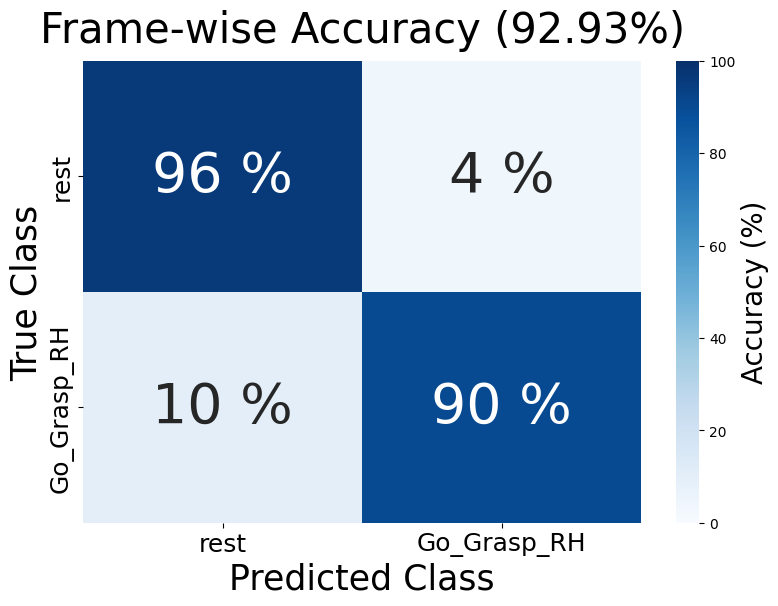

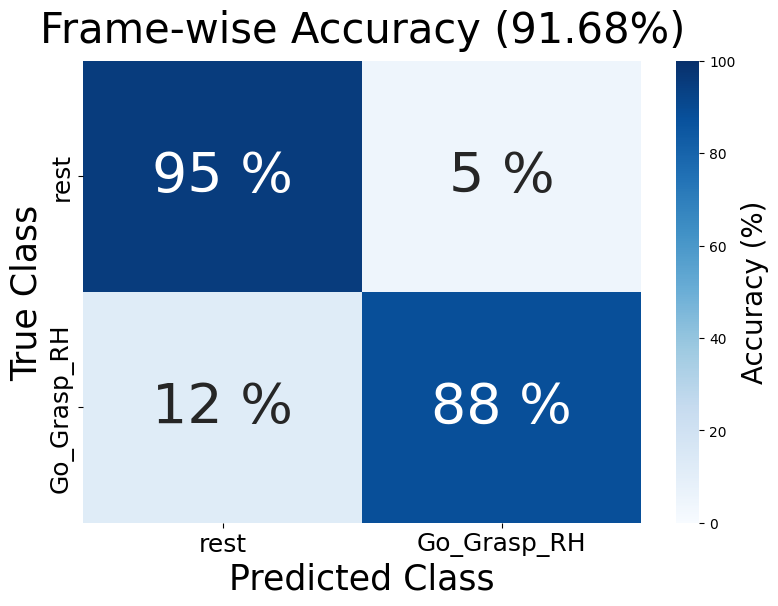

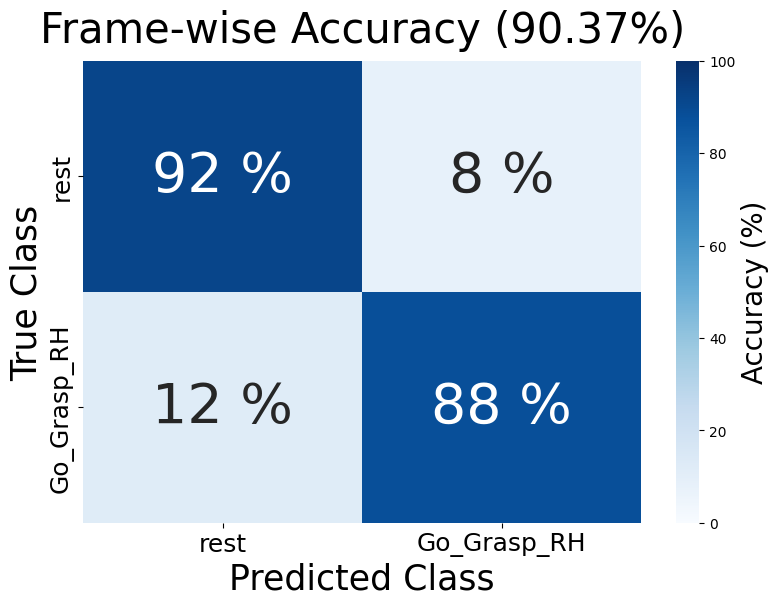

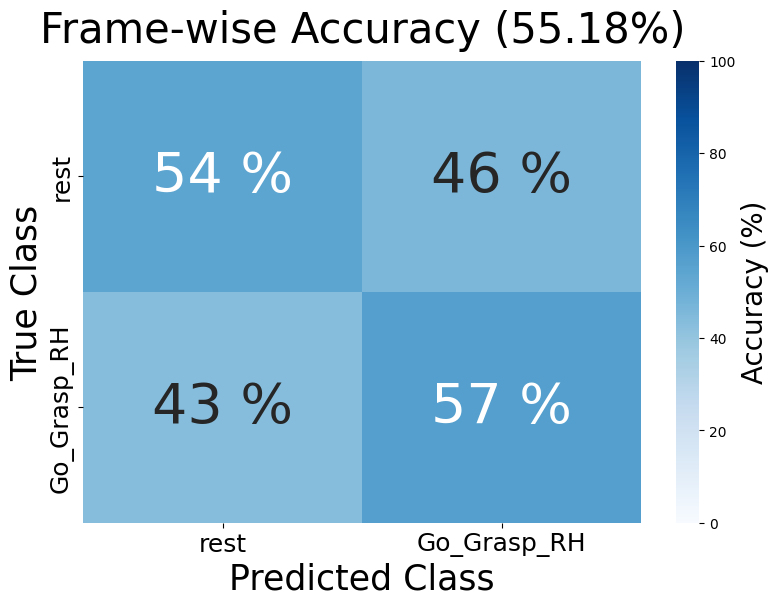

In [6]:
_, _, _ = confusion_matrix_display(this_confusion_matrix_model_allchans, model_classes, suppress_figs = 'No')
_, _, _ = confusion_matrix_display(this_confusion_matrix_model_nochan112, model_classes, suppress_figs = 'No')
_, _, _ = confusion_matrix_display(this_confusion_matrix_model_handknob, model_classes, suppress_figs = 'No')
_, _, _ = confusion_matrix_display(this_confusion_matrix_model_badchannelsonly, model_classes, suppress_figs = 'No') 